<div style="text-align:center">
    <h1>Airplane flight prediction</h1>
</div>

### Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load data

In [2]:
df = pd.read_csv("C:/Users/ernes/OneDrive/Data/Clean_Dataset.csv")

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Summarize of DataFrame

In [3]:
df.describe(include="all")

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


### Identifying Null Values

In [4]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Drop the column of indexes because is not important

In [5]:
df = df.drop(df.columns[0], axis = 1)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Transform variables

In [6]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

Iterate for change the data type to category

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

df.dtypes 

airline             category
flight              category
source_city         category
departure_time      category
stops               category
arrival_time        category
destination_city    category
class               category
duration             float64
days_left              int64
price                  int64
dtype: object

We transform the 'days_left' column into a categorical one, where one category corresponds to values 
1 or 2, and the other category corresponds to values greater than 2

In [8]:
df['days_left'] = df['days_left'].apply(lambda x: '1-2' if x <= 1 else '>2')
df['days_left'] = df['days_left'].astype('category')
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1-2,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1-2,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1-2,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1-2,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1-2,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,>2,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,>2,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,>2,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,>2,81585


### Frequency of airline

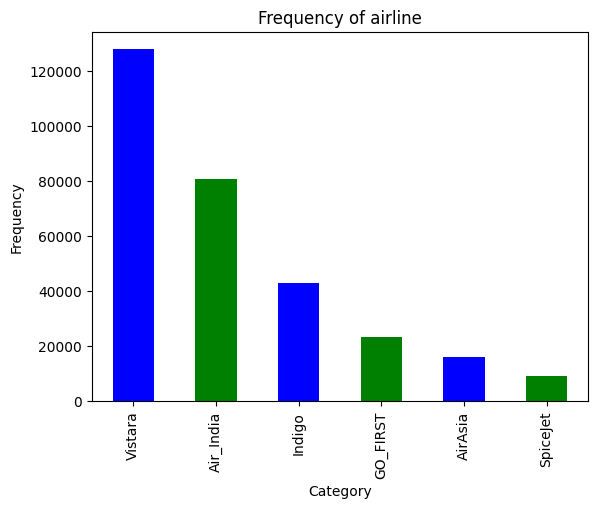

In [9]:
counts = df['airline'].value_counts()

# Bar graph
counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Frequency of airline')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

### Choose the dependent variables

In [10]:
X = df[['airline','flight','source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']]
Y = df[['price']]

### Transform the airline variable into a dummie

In [11]:
airline = pd.get_dummies(X['airline'], columns=['airline'], drop_first=True)
airline.head()

,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


### Does the price vary depending on the airlines?

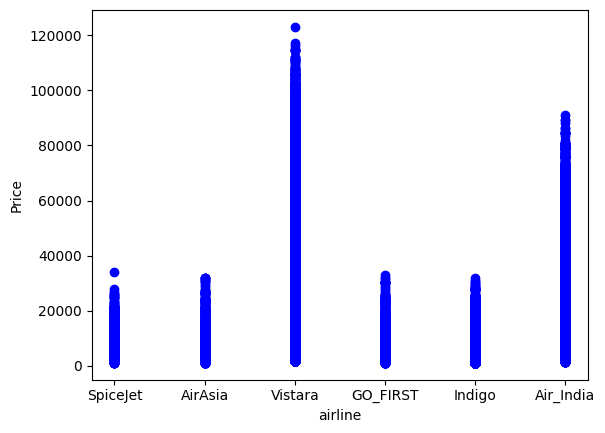

In [12]:
plt.scatter(df.airline, df.price,  color='blue')
plt.xlabel('airline')
plt.ylabel("Price")
plt.show()

### Split the data into train and test sets

In [13]:
from sklearn.model_selection import train_test_split
airline_train, airline_test, Y_train, Y_test = train_test_split(airline, Y, test_size = .20, random_state = 40)

### Adjust the model

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(airline_train, Y_train)
# The coefficients
print('The category', df['airline'].cat.categories.values[0], 'is the intecerpt', regr.intercept_[0])
print('The coeficients are:')
for i in range(1, len(df['airline'].cat.categories.values)):
    print(df['airline'].cat.categories.values[i], ':', regr.coef_[0][i-1])

print('\nE[', df['airline'].cat.categories.values[0], '] = ', regr.intercept_[0])
for i in range(1, len(df['airline'].cat.categories.values)):
    print('E[', df['airline'].cat.categories.values[i], '] = ', regr.intercept_[0] + regr.coef_[0][i-1])
    


The category AirAsia is the intecerpt 4088.830197555406
The coeficients are:
Air_India : 19429.66766460146
GO_FIRST : 1556.57483516922
Indigo : 1236.0553045931983
SpiceJet : 2118.1724427965273
Vistara : 26252.174815416533

E[ AirAsia ] =  4088.830197555406
E[ Air_India ] =  23518.497862156866
E[ GO_FIRST ] =  5645.405032724626
E[ Indigo ] =  5324.885502148604
E[ SpiceJet ] =  6207.002640351933
E[ Vistara ] =  30341.00501297194


The price does vary depending on the airline.

### Prediction

In [15]:
Y_hat = regr.predict(airline_test)

print("Mean Squared Error (MSE) : %.2f"
      % np.mean((Y_hat - Y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(airline_test, Y_test))


Mean Squared Error (MSE) : 404129047.53
Variance score: 0.22


C:\Users\ernes\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


The model does not explain the variability of the output very well

## Ajudst a better model

### Transform the dummies

In [16]:
X = df[['airline','source_city', 'stops', 'class', 'duration', 'days_left']]
Y = df[['price']]

X = pd.get_dummies(X, columns=['airline','source_city', 'stops', 'class', 'days_left'], drop_first=True)
X.head()

,duration,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,stops_two_or_more,stops_zero,class_Economy,days_left_>2
0,2.17,0,0,0,1,0,0,1,0,0,0,0,1,1,0
1,2.33,0,0,0,1,0,0,1,0,0,0,0,1,1,0
2,2.17,0,0,0,0,0,0,1,0,0,0,0,1,1,0
3,2.25,0,0,0,0,1,0,1,0,0,0,0,1,1,0
4,2.33,0,0,0,0,1,0,1,0,0,0,0,1,1,0


### Split the data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

### Adjust the model 

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)

# The coefficients
print ('Coefficients: ', regr.coef_) 
print('Intercept:', regr.intercept_)

Coefficients:  [[ 5.20208277e+01  4.35877410e+02  1.83401211e+03  2.47744950e+03
   3.08200975e+03  4.40119796e+03  9.97920470e+00 -1.07779111e+03
  -1.33977333e+03  1.32757690e+03 -1.20272102e+02  2.63252571e+03
  -7.70705385e+03 -4.50099462e+04 -8.78639109e+03]]
Intercept: [58401.66348239]


### Predict the price

In [19]:
Y_hat = regr.predict(X_test)

print("Mean Squared Error (MSE) : %.2f"
      % np.mean((Y_hat - Y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))


Mean Squared Error (MSE) : 50453077.48
Variance score: 0.90


C:\Users\ernes\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


This model is better to predict the price, there is little variability